# Universidad de Buenos Aires
# Deep Learning - TP1
# Alumno: Matias Werbin

## Ejercicio 1

**Dado** el grafo de cómputo de la imagen siguiente, donde a=1, b=2 y c=3:

1. Realizar el paso forward y calcular Y.

2. Realizar el paso backward y calcular el backpropagation para a,b y c:

    a. En forma analítica (dy/dx = 0)

    b. Utilizando pytorch

    c. Comparar los resultados de los puntos anteriores

**Grafo de Cómputo:**

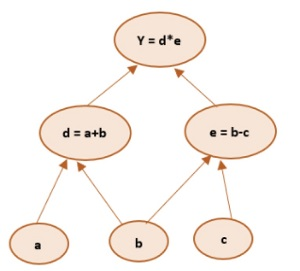



In [ ]:
# importación de librerias a utilizar

import pandas as pd
import numpy as np
import torch


1. Realizar el paso forward y calcular Y. Este punto se realizo de dos maneras:

* Con ingreso por teclado (usuario) de variables a, b y c (para validad resultados correctos se debe ingresar a=1, b=2 y c=3)
* Usando valores detallados en grafo del ejercicio a=1, b=2 y c=3



In [ ]:
# Solicitamos al usuario que ingrese valores de a, b y c

a = float(input("Ingrese el valor de la variable a: "))
b = float(input("Ingrese el valor de la variable b: "))
c = float(input("Ingrese el valor de la variable c: "))

# Creación de variables d y e
d = a + b
e = b - c

# Creación de la variable objetivo Y
Y = d * e

# Print paso forward con valores inciiales de a, b y c seteados por el usuario

print(f"El resultado del paso forward, segun los valores que ingreso el usuario para a, b y c es: {Y}")


Ingrese el valor de la variable a: 1
Ingrese el valor de la variable b: 2
Ingrese el valor de la variable c: 3
El resultado del paso forward, segun los valores que ingreso el usuario para a, b y c es: -3.0


In [ ]:
# Inicializamos los valores de a, b y c

a = 1
b = 2
c = 3

# Creación de variables d y e
d = a + b
e = b - c

# Creación de la variable objetivo Y
Y = d * e

# Print paso forward con valores inciiales de a, b y c seteados por el usuario

print(f"El resultado del paso forward es: {Y}")

El resultado del paso forward es: -3


2. Realizar el paso backward y calcular el backpropagation para a, b y c:

    a. En forma analítica (dy/dx = 0)

In [ ]:
# dy/da = dy/dd * dd/da = e * 1 = e

dya=e

print(f"El paso backward para a, es decir, dy/da, es: {dya}")




El paso backward para a, es decir, dy/da, es: -1


In [ ]:
# dy/db = (dy/dd *dd/db + dy/de * de/dv) = (e * 1 + d * 1 ) = e + d

dyb= e + d

print(f"El paso backward para a, es decir, dy/db, es: {dyb}")

El paso backward para a, es decir, dy/db, es: 2


In [ ]:
# dy/dc = (dy/de * de/dc) = d * -1 = -d

dyc=-d

print(f"El paso backward para a, es decir, dy/dc, es: {dyc}")

El paso backward para a, es decir, dy/dc, es: -3


2. Realizar el paso backward y calcular el backpropagation para a, b y c:

    b. Utilizando pytorch


In [ ]:
tensor_a=torch.tensor([1.0],requires_grad=True)
tensor_b=torch.tensor([2.0],requires_grad=True)
tensor_c=torch.tensor([3.0],requires_grad=True)
tensor_d = tensor_a + tensor_b
tensor_e = tensor_b - tensor_c
tensor_Y = tensor_d * tensor_e

In [ ]:
tensor_Y.backward()
print(tensor_a.grad)
print(tensor_b.grad)
print(tensor_c.grad)

tensor([-1.])
tensor([2.])
tensor([-3.])


2. Realizar el paso backward y calcular el backpropagation para a,b y c:

    c. Comparar los resultados de los puntos anteriores

**Los resultados al comparar el punto 2.1 y 2.2 son iguales.**

Podriamos destacar algunas cosas positivas y negativas para cada forma de resolver:

* Analiticamente: permite tener una correcta comprensión del proceso de backward de una red neuronal pero puede ser mas propenso a errores cuando las funciones a derivar son mas complejas

* Pytorch: sin dudas la ventaja es la eficiencia y la automatización del proceso de backward pero se podria tomar como desventaja que funciona como "caja negra" y dejando a un lado la comprensión del mismo


## Ejercicio 2

Se desea construir un sistema de recomendación de películas. Para esto se cuenta con un dataset de las puntuaciones que los usuarios han asignado a las peliculas disponibles.

Link dataset: https://drive.google.com/file/d/1Og9H-8oqb3_Wo_WOakeAuRR_mwr922Ar/view?usp=sharing

Para verificar la factibilidad del proyecto con datos válidos, se decide utilizar solamente las 200 películas con más votos y los usuarios que han puntuado al menos 100 películas.

1- Analizar el dataset para utilizar solamente las 200 películas con mayor cantidad de votos y los usuarios que hayan votado al menos 100 películas.

2- A partir del dataset del punto 1, construir una única red neuronal que utilice una capa de embeddings para el id de usuario, una capa de embeddings para el id de película y al menos dos capas lineales que sea capaz de predecir el puntaje que cada usuario colocó a cada pelicula.

3- Elegir un usuario al azar, una película que dicho usuario haya puntuado y verificar la predicción del modelo. Comparar con el puntaje real que el usuario asignó a dicha película.

4- Realizar una recomendación de película para el usuario del punto 3 utilizando los embeddings de usuario o los embeddings de películas. Comprobar si la recomendación es correcta haciendo una predicción del puntuaje con la red neuronal.

In [ ]:
# importación de librerias

from torch.utils.data import Dataset, DataLoader
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# colocar el path asociado al archivo ratings.csv correspondiente al drive que se este utilizando

file_path="/content/drive/MyDrive/TP 1-Deep Learning/ratings.csv"

In [ ]:
df=pd.read_csv(file_path)

In [ ]:
# En caso de cargar directamente el csv al colab ejecutar este código

# df=pd.read_csv("/content/ratings.csv")

In [ ]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df.info() # info() nos brinda un vistazo rápido de nombre y cantidad de columnas, cantidad de registros nulos y no nulos como tipo de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
df.isna().sum() # no hay valores nulos en ninguna columna. Tambien podría haberse observado en la linea anterior con info()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Procesamiento de la variable Timestamp- La misma se encuentra en formato int64 y representa la cantidad de segundos transcurrido desde Tiempo unix: 1970-01-01 00:00:00

In [ ]:
print(df['timestamp'].head())

0    964982703
1    964981247
2    964982224
3    964983815
4    964982931
Name: timestamp, dtype: int64


In [ ]:
# Asegurarse de que los valores sean números

df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')

# Verificar de nuevo los datos

print(df['timestamp'].head())

print('')

print(f"Cantidad de valores nulos en timestamp: {df['timestamp'].isna().sum()}")


0    964982703
1    964981247
2    964982224
3    964983815
4    964982931
Name: timestamp, dtype: int64

Cantidad de valores nulos en timestamp: 0


In [ ]:
# Convertir la columna de timestamps Unix a datetime

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Agregar una nueva columna con las fechas en formato legible

df['fecha'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Mostrar las primeras filas del DataFrame modificado

print(df.head())


   userId  movieId  rating           timestamp                fecha
0       1        1     4.0 2000-07-30 18:45:03  2000-07-30 18:45:03
1       1        3     4.0 2000-07-30 18:20:47  2000-07-30 18:20:47
2       1        6     4.0 2000-07-30 18:37:04  2000-07-30 18:37:04
3       1       47     5.0 2000-07-30 19:03:35  2000-07-30 19:03:35
4       1       50     5.0 2000-07-30 18:48:51  2000-07-30 18:48:51


In [ ]:
# Borramos columna timestamp

df.drop(columns=['timestamp'],inplace=True)

In [ ]:
df.head()

,userId,movieId,rating,fecha
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


Procederemos hacer el punto 2.1 asociado a segmentación:

* las 200 películas con mayor cantidad de votos
* los usuarios que hayan votado al menos 100 películas

Antes debemos revisar que no se presenten duplicados en el df

In [ ]:
duplicados = df[df.duplicated(subset=['userId', 'movieId'], keep=False)]


print(f'Cantidad de duplicado en df: {len(duplicados)}')

Cantidad de duplicado en df: 0


In [ ]:
# Creamos grupos por movieId para determinar cantidad de puntuaciones de c/u

rating_top=df.groupby('movieId')['rating'].count()
print(rating_top)

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64


In [ ]:
# Ordenamos de forma descencendante cada movieId segun cantidad de ratings

rating_top_df=pd.DataFrame(rating_top).sort_values('rating',ascending=False)
rating_top_df.reset_index(inplace=True)

In [ ]:
rating_top_df # corroboramos que este ordenado

,movieId,rating
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278
...,...,...
9719,4093,1
9720,4089,1
9721,58351,1
9722,4083,1


In [ ]:
# Creamos numpy array con la 200 peliculas con mas puntuaciones

movies_top200=np.array(rating_top_df['movieId'].head(200))
movies_top200

array([  356,   318,   296,   593,  2571,   260,   480,   110,   589,
         527,  2959,     1,  1196,    50,  2858,    47,   780,   150,
        1198,  4993,  1210,   858,   457,   592,  5952,  2028,  7153,
         588,   608,  2762,   380,    32,   364,  1270,   377,  3578,
        4306,  1580,   590,   648,   344,  4226,   367, 58559,  6539,
        1214,   595,  1036,   165,   500,  1265, 79132,  1197,  6377,
        1704,   316,  2628,  1291,  1721,   153,  1136,   597,   293,
        1193,  3793,   231,  4886,    10,  1089,  7361,  6874,  1240,
        1221,  2329,    34,  1200,  1213,  1682,  8961,   541,  4995,
         736,  5349,  1097,  2683,   733,  2716,  1206,  4973,  5445,
        1073,  4963,   586, 33794,  1527,   208,   587,  5989,  1968,
         185,  5418,  3147,  3996,   349,     2,  7438,  2918,  1258,
         924,  4878,   253,  2115,   329,  1208,  4896, 48516,   539,
        1732,  1923, 68954,   223, 60069,    39,   111,  2706,   357,
         161,     6,

In [ ]:
# corroboramos que tengamos 200 id peliculas

len(movies_top200)

200

In [ ]:
# Creamos grupos por userID para determinar cantidad de puntuaciones de c/u

user_top=df.groupby('userId')['rating'].count()
print(user_top)

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64


In [ ]:
# Obtenemos df con todos los usuarios que puntuaron al menos 100 peliculas

user_top_df=pd.DataFrame(user_top)
user_top_df=user_top_df.reset_index().sort_values('rating',ascending=False)
user_100_df=user_top_df[user_top_df['rating']>=100]

In [ ]:
user_100_df

,userId,rating
413,414,2698
598,599,2478
473,474,2108
447,448,1864
273,274,1346
...,...,...
31,32,102
600,601,101
38,39,100
603,604,100


In [ ]:
# Generamos numpy array de userID que puntuaron al menos 100 peliculas

users_100=np.array(user_100_df['userId'])
users_100

array([414, 599, 474, 448, 274, 610,  68, 380, 606, 288, 249, 387, 182,
       307, 603, 298, 177, 318, 232, 480, 608, 600, 483, 590, 105,  19,
       305, 489, 111, 438, 217, 140, 477, 555,  91,  28, 219, 534,  89,
        64, 226, 561,  18, 525,  57, 381, 368, 509, 469, 560, 462, 292,
        21, 597,  42, 294, 160, 580, 596, 202, 275, 517,  45, 156, 514,
       391, 567, 357, 103, 339,  62, 199, 125,  51, 132,  66, 313, 200,
       221,   6, 453,  50, 425, 428, 573, 352,  84, 122, 382, 356, 239,
       135, 365, 484, 104,  63, 325, 169, 332, 290, 495, 432, 187, 328,
       222, 212, 330,  20, 282, 372, 434, 594,   1, 562, 198,  82, 186,
       354, 312, 605,  41,   4, 304, 119, 563, 263,  73, 586, 220, 246,
       234, 452, 385, 522, 280, 139, 570, 166, 317, 552, 607, 195, 520,
       367, 479, 266, 153,  74, 279, 256, 167, 331,  95, 141, 527, 410,
        80, 587, 117, 346, 216, 265, 577, 564,  33, 419, 475, 572, 334,
       260, 287,   7, 326, 233, 113, 247, 100, 420, 351, 408, 13

In [ ]:
# cantidad de usuarios que puntuaron al menos 100 peliculas

len(users_100)

248

In [ ]:
# Filtramos el dataset por movies_top200 & users_100

df_filter = df[df['movieId'].isin(movies_top200) & df['userId'].isin(users_100)]

In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18588 entries, 0 to 100452
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   18588 non-null  int64  
 1   movieId  18588 non-null  int64  
 2   rating   18588 non-null  float64
 3   fecha    18588 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 726.1+ KB


In [ ]:
print(f"La cantidad de valores unicos de peliculas es {len(df_filter.movieId.unique())} y la cantidad de usuarios unicos es {len(df_filter.userId.unique())}")

 # Podemos observar que en el dataset filtrado aparecen las 200 peliculas más puntuadas como tambien los 248 usuarios que puntuaron al menos 100 peliculas

La cantidad de valores unicos de peliculas es 200 y la cantidad de usuarios unicos es 248


In [ ]:
# Cardinalidad de columnas fecha

print(f"La cardinalidad de la feature fecha es: {len(df_filter.fecha.unique())}")

La cardinalidad de la feature fecha es: 16947


Podemos observar que la columna fecha tiene una cardinalidad = 16947 haremos dos aproach en la red:

1. Dropear la columna
2. Obtener el weekday para determinar si el dia de la semana afecta a la puntuacion de los usuarios sobre las peliculas

1. Dropear la columna

In [ ]:
df_filter_1=df_filter.copy()
df_filter_1=df_filter_1.drop(columns=['fecha']) # Eliminamos fecha

In [ ]:
targets=df_filter_1.rating.unique()
min=np.min(targets)
max=np.max(targets)

print(f"Los valores unicos de targets-rating son {np.sort(targets)}. El valor minimo encontrado es {min} mientra que el maximo es {max}")

Los valores unicos de targets-rating son [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]. El valor minimo encontrado es 0.5 mientra que el maximo es 5.0


Nos encontramos en un problema de regresión.  Por los valores unicos de los puntajes podemos deducir que la escala de puntuación es de 0 a 5, ya que el valor minimo es 0.5 y el maximo es 5.

Se podría tomar la estragia de generar una nueva variable target y pasar de un problema de regresión a uno de clasificación (problemas más estudiados) con tres clases mediante la creacion de 3 bins y categorizar la variable.

* Si 0 <= rating < 3 No recomendar. Clase 0
* Si 3 <= rating < 4 Recomendación moderada. Clase 1
* Si 4 <= rating < 5 Recomendación alta. Clase 2

Pero debido a que el enunciado nos consulta sobre comparar sobre resultados reales del dataset evitaremos generar dichos bins para la transformación de un problema de regresión a clasificación. Sería una buena practica comparar resultados de ambas resoluciones



In [ ]:
# Generacion de entradas y salida

y=df_filter_1['rating']
x_moviesid=df_filter_1['movieId']
x_usersid=df_filter_1['userId']

In [ ]:
x_moviesid.info() # non nulls y valores numericos

<class 'pandas.core.series.Series'>
Index: 18588 entries, 0 to 100452
Series name: movieId
Non-Null Count  Dtype
--------------  -----
18588 non-null  int64
dtypes: int64(1)
memory usage: 290.4 KB


In [ ]:
x_usersid.info() # non nulls y valores numericos

<class 'pandas.core.series.Series'>
Index: 18588 entries, 0 to 100452
Series name: userId
Non-Null Count  Dtype
--------------  -----
18588 non-null  int64
dtypes: int64(1)
memory usage: 290.4 KB


In [ ]:
y.info() # non nulls y valores numericos

<class 'pandas.core.series.Series'>
Index: 18588 entries, 0 to 100452
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
18588 non-null  float64
dtypes: float64(1)
memory usage: 290.4 KB


In [ ]:
# Split dataset: 85-15 (train-valid)

idx = np.random.permutation(x_usersid.shape[0]) # tomamos indices aleatorios
train_idx = idx[0:int(0.85*len(idx))]
valid_idx = idx[int(0.85*len(idx)):]

In [ ]:
# Transformación de userId a indices (idx) consecutivos para utilizar embeddings

user_id_to_idx = {value:i for i,value in enumerate(x_usersid.unique())}

# Transformación de movieId a indices (idx) consecutivos para utilizar embeddings

movie_id_to_idx = {value:i for i,value in enumerate(x_moviesid.unique())}


In [ ]:
# Mapeo y transforma en narray

user_idx=np.array([user_id_to_idx[value] for value in x_usersid])
movie_idx=np.array([movie_id_to_idx[value] for value in x_moviesid])
y=y.to_numpy()

In [ ]:
# Train

train_x_user=user_idx[train_idx]
train_x_movie=movie_idx[train_idx]
y_train=y[train_idx]

# Valid

valid_x_user=user_idx[valid_idx]
valid_x_movie=movie_idx[valid_idx]
y_valid=y[valid_idx]

In [ ]:
# Clase Dataset de Pytorch con Embeddings

class DatasetEmbeddings(Dataset):
  def __init__(self,user_idx,movie_idx,y):
    self.user_idx=user_idx
    self.movie_idx=movie_idx
    self.y=y

  def __len__(self):
    return self.user_idx.shape[0]

  def __getitem__(self, idx):
    return self.user_idx[idx],self.movie_idx[idx], self.y[idx]


In [ ]:
train_embeddings= DatasetEmbeddings(train_x_user,train_x_movie,y_train)
valid_embedings= DatasetEmbeddings(valid_x_user,valid_x_movie,y_valid)

In [ ]:
# Cargamos datos por lotes

train_dataloader_emb=DataLoader(train_embeddings, batch_size=64, shuffle=True)
valid_dataloader_emb=DataLoader(valid_embedings,batch_size=64)

In [ ]:
# Arquitectura de Red

class NNetEmbeddings(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.embeddings_1=torch.nn.Embedding(num_embeddings=248, embedding_dim=6)
    self.embeddings_2=torch.nn.Embedding(num_embeddings=200, embedding_dim=4)
    self.linear_1=torch.nn.Linear(in_features=6+4, out_features=200, bias=True)
    self.bn_1 = torch.nn.BatchNorm1d(200)
    self.dropout_1=torch.nn.Dropout(0.2)
    self.relu_1=torch.nn.ReLU()
    self.linear_2=torch.nn.Linear(in_features=200, out_features=100,bias=True)
    self.bn_2 = torch.nn.BatchNorm1d(100)
    self.dropout_2=torch.nn.Dropout(0.2)
    self.relu_2=torch.nn.ReLU()
    self.linear_3=torch.nn.Linear(in_features=100, out_features=10,bias=True)
    self.bn_3 = torch.nn.BatchNorm1d(10)
    self.dropout_3=torch.nn.Dropout(0.2)
    self.relu_3=torch.nn.ReLU()
    self.output=torch.nn.Linear(in_features=10, out_features=1)

  def forward(self, user_idx,movie_idx):
    embeddings_output_1=self.embeddings_1(user_idx)
    embedings_output_2=self.embeddings_2(movie_idx)
    x=torch.cat([embeddings_output_1,embedings_output_2], dim=1)
    x = self.linear_1(x)
    x = self.bn_1(x)
    x = self.dropout_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.bn_2(x)
    x = self.dropout_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    x = self.bn_3(x)
    x = self.dropout_3(x)
    x = self.relu_3(x)
    x = self.output(x)
    return x

In [ ]:
# inicializamos device

device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

device

'cpu'

In [ ]:
# Inicilializamos red y enviamos al device

nnetembeddings=NNetEmbeddings()
nnetembeddings.to(device)

NNetEmbeddings(
  (embeddings_1): Embedding(248, 6)
  (embeddings_2): Embedding(200, 4)
  (linear_1): Linear(in_features=10, out_features=200, bias=True)
  (bn_1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout_1): Dropout(p=0.2, inplace=False)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=100, bias=True)
  (bn_2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout_2): Dropout(p=0.2, inplace=False)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=10, bias=True)
  (bn_3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout_3): Dropout(p=0.2, inplace=False)
  (relu_3): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Defino loss y optimizer

loss=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adam(nnetembeddings.parameters(),lr=0.001,weight_decay=0.01)


In [ ]:
epochs=50
train_loss_by_epoch=[]
valid_loss_by_epoch=[]

# Epochs

for epoch in range(epochs):
  nnetembeddings.train()
  train_epoch_loss=0
  valid_epoch_loss=0
  valid_epoch_y=[]
  valid_epoch_y_hat=[]

  # Entrenamiento

  for i,data in enumerate(train_dataloader_emb):
    embed_batch_1, embed_batch_2, y_batch= data
    embed_batch_1= embed_batch_1.to(device).int()
    embed_batch_2= embed_batch_2.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1,1)

    optimizer.zero_grad()
    nnet_out=nnetembeddings(embed_batch_1,embed_batch_2)
    y_batch_hat=nnet_out
    loss_train=loss(y_batch_hat,y_batch)
    loss_train.backward()
    optimizer.step()
    train_epoch_loss += loss_train.item()

  # Validacion

  nnetembeddings.eval()
  with torch.no_grad():
    for i, data in enumerate(valid_dataloader_emb):
      embed_batch_1, embed_batch_2, y_batch= data
      embed_batch_1= embed_batch_1.to(device).int()
      embed_batch_2= embed_batch_2.to(device).int()
      y_batch = y_batch.to(device).float().reshape(-1,1)

      nnet_out = nnetembeddings(embed_batch_1,embed_batch_2)
      y_batch_hat = nnet_out
      loss_valid = loss(y_batch_hat, y_batch)
      valid_epoch_loss += loss_valid.item()
      valid_epoch_y += list(y_batch.detach().cpu().numpy())
      valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

  # Normalizamos perdidas de Train y Valid

  train_epoch_loss /= len(train_dataloader_emb.dataset)
  valid_epoch_loss /= len(valid_dataloader_emb.dataset)

  # Almacena las pérdidas por época

  train_loss_by_epoch.append(train_epoch_loss)
  valid_loss_by_epoch.append(valid_epoch_loss)
  valid_mae = metrics.mean_absolute_error(valid_epoch_y, valid_epoch_y_hat)

  # Imprimir progreso por epoca

  print(f"Epoca {epoch} - Pérdida de Entrenamiento: {train_epoch_loss:.3f} - Pérdida de Validación: {valid_epoch_loss:.3f} - MAE de Validación: {valid_mae:.3f}")



Epoca 0 - Pérdida de Entrenamiento: 6.424 - Pérdida de Validación: 2.549 - MAE de Validación: 1.408
Epoca 1 - Pérdida de Entrenamiento: 1.825 - Pérdida de Validación: 0.936 - MAE de Validación: 0.772
Epoca 2 - Pérdida de Entrenamiento: 1.500 - Pérdida de Validación: 0.924 - MAE de Validación: 0.773
Epoca 3 - Pérdida de Entrenamiento: 1.436 - Pérdida de Validación: 0.893 - MAE de Validación: 0.756
Epoca 4 - Pérdida de Entrenamiento: 1.385 - Pérdida de Validación: 0.882 - MAE de Validación: 0.746
Epoca 5 - Pérdida de Entrenamiento: 1.331 - Pérdida de Validación: 0.849 - MAE de Validación: 0.728
Epoca 6 - Pérdida de Entrenamiento: 1.295 - Pérdida de Validación: 0.846 - MAE de Validación: 0.732
Epoca 7 - Pérdida de Entrenamiento: 1.269 - Pérdida de Validación: 0.810 - MAE de Validación: 0.709
Epoca 8 - Pérdida de Entrenamiento: 1.233 - Pérdida de Validación: 0.839 - MAE de Validación: 0.730
Epoca 9 - Pérdida de Entrenamiento: 1.180 - Pérdida de Validación: 0.823 - MAE de Validación: 0.719


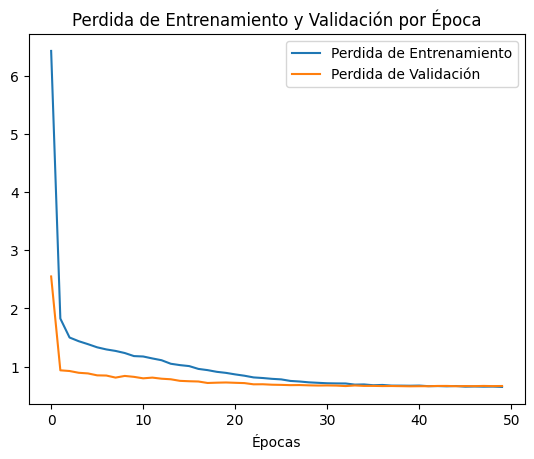

In [ ]:
fig, ax = plt.subplots (1,1)

ax.plot(train_loss_by_epoch, label='Perdida de Entrenamiento')
ax.plot(valid_loss_by_epoch, label='Perdida de Validación')
ax.set_xlabel('Épocas')
ax.set_label('Pérdida')
ax.set_title('Perdida de Entrenamiento y Validación por Época')
ax.legend()
plt.show()

Podemos observar que al usar regularización L2 (weight decay) y Batch normalization el modelo no overfittea

3- Elegir un usuario al azar, una película que dicho usuario haya puntuado y verificar la predicción del modelo. Comparar con el puntaje real que el usuario asignó a dicha película.

In [ ]:
import random

# Elegir un usuario al azar

random_user_index = random.randint(0, len(train_x_user) - 1)
random_user = train_x_user[random_user_index]
random_user_movies = train_x_movie[train_x_user == random_user]

# Elegir una película que el usuario haya puntuado

random_movie_index = random.randint(0, len(random_user_movies) - 1)
random_movie = random_user_movies[random_movie_index]

# Obtener la puntuación real

actual_rating = y_train[train_x_user == random_user][random_movie_index]

# Convertir a tensores y pasar al dispositivo

random_user_tensor = torch.tensor([random_user], dtype=torch.int64).to(device)
random_movie_tensor = torch.tensor([random_movie], dtype=torch.int64).to(device)

# Obtener la predicción del modelo

nnetembeddings.eval()
with torch.no_grad():
    predicted_rating = nnetembeddings(random_user_tensor, random_movie_tensor).item()

# Mostrar los resultados

print(f"Usuario ID: {random_user.item()}")
print(f"Película ID: {random_movie.item()}")
print(f"Puntuación real: {actual_rating.item()}")
print(f"Predicción del modelo: {predicted_rating:.3f}")


Usuario ID: 30
Película ID: 12
Puntuación real: 4.0
Predicción del modelo: 2.936


4- Realizar una recomendación de película para el usuario del punto 3 utilizando los embeddings de usuario o los embeddings de películas. Comprobar si la recomendación es correcta haciendo una predicción del puntuaje con la red neuronal.

La recomendación se realizará segun las siguientes condiciones:

* Recomendar la pelicula que mayor puntaje de prediccion tenga siempre y cuando no la haya visto y su prediccion sea mayor a 3. Sino, recomendar la pelicula con mayor puntaje real.

In [ ]:
nnetembeddings.eval()

# Calcular las predicciones del modelo para todas las películas posibles

all_movies_tensor = torch.arange(0, 200, dtype=torch.int64).to(device)
predicted_ratings = []

with torch.no_grad():
    user_embedding = nnetembeddings.embeddings_1(random_user_tensor)
    for movie in all_movies_tensor:
        movie_tensor = torch.tensor([movie], dtype=torch.int64).to(device)
        movie_embedding = nnetembeddings.embeddings_2(movie_tensor)
        predicted_rating = nnetembeddings.output(torch.cat([user_embedding, movie_embedding], dim=1)).item()
        predicted_ratings.append(predicted_rating)

predicted_ratings_tensor = torch.tensor(predicted_ratings)

# Obtener la película con la mayor predicción

max_predicted_rating_index = torch.argmax(predicted_ratings_tensor)
recommended_movie_index = max_predicted_rating_index.item()
recommended_movie = all_movies_tensor[recommended_movie_index].item()
predicted_rating_for_recommendation = predicted_ratings_tensor[recommended_movie_index].item()

# Verificar si el usuario ha visto la película

if recommended_movie not in random_user_movies:

    # Si no la ha visto, recomendarla si la predicción es mayor o igual a 3

    if predicted_rating_for_recommendation >= 3:
        print(f"Usuario ID: {random_user.item()}")
        print(f"Película recomendada ID: {recommended_movie}")
        print(f"Predicción del modelo para la película recomendada: {predicted_rating_for_recommendation:.3f}")
    else:
        # Si no supera la predicción, buscar la película mejor valorada que haya visto

        max_user_rating_index = torch.tensor(np.argmax(y_train[np.isin(train_x_movie, random_user_movies)]))
        recommended_movie_index = max_user_rating_index.item()
        recommended_movie = random_user_movies[recommended_movie_index].item()
        actual_rating = y_train[(train_x_user == random_user) & (train_x_movie == recommended_movie)].item()
        print(f"Usuario ID: {random_user.item()}")
        print(f"Película recomendada ID: {recommended_movie}")
        print(f"Predicción del modelo para la película recomendada: {predicted_rating_for_recommendation:.3f}")
        print(f"Puntuación real: {actual_rating}")


Usuario ID: 30
Película recomendada ID: 110
Predicción del modelo para la película recomendada: 3.701


2. Obtener el weekday para determinar si el dia de la semana afecta a la puntuacion de los usuarios sobre las peliculas

In [ ]:
df_filter_2=df_filter.copy()
df_filter_2['dow']=pd.to_datetime(df_filter_2['fecha']).dt.dayofweek

In [ ]:
# dropeo columna fecha

df_filter_2.drop(columns='fecha',inplace=True)

In [ ]:
df_filter_2.head() # corroboro que se haya eliminado columna fecha y creado dow


,userId,movieId,rating,dow
0,1,1,4.0,6
2,1,6,4.0,6
3,1,47,5.0,6
4,1,50,5.0,6
7,1,110,4.0,6


In [ ]:
# Realizamos one hoy encoding para dow

one_hot_encoded = pd.get_dummies(df_filter_2['dow'], prefix='dow', drop_first=True)

# Convertir los valores True/False a 0/1

one_hot_encoded = one_hot_encoded.astype(int)

# Concatenar las columnas one-hot al DataFrame original

df_encoded = pd.concat([df_filter_2, one_hot_encoded], axis=1)

print(df_encoded) # se obeserva que hay 6 dummies columns por lo que un dia de la semana no posee ratings

        userId  movieId  rating  dow  dow_1  dow_2  dow_3  dow_4  dow_5  dow_6
0            1        1     4.0    6      0      0      0      0      0      1
2            1        6     4.0    6      0      0      0      0      0      1
3            1       47     5.0    6      0      0      0      0      0      1
4            1       50     5.0    6      0      0      0      0      0      1
7            1      110     4.0    6      0      0      0      0      0      1
...        ...      ...     ...  ...    ...    ...    ...    ...    ...    ...
100326     610    60069     4.5    2      0      1      0      0      0      0
100371     610    68157     5.0    2      0      1      0      0      0      0
100380     610    68954     3.5    2      0      1      0      0      0      0
100417     610    72998     4.5    5      0      0      0      0      1      0
100452     610    79132     4.0    2      0      1      0      0      0      0

[18588 rows x 10 columns]


In [ ]:
# dropeamos una de las dummies ya que con n-1 variables podemos descibir n
# dropeamos dow ya que la describiremos con las dummies

df_encoded.drop(columns=['dow_1','dow'],inplace=True)

In [ ]:
y=df_encoded['rating']
x=df_encoded[['dow_2','dow_3','dow_4','dow_5','dow_6']]
x_moviesid=df_encoded['movieId']
x_usersid=df_encoded['userId']

In [ ]:
y.info() # no hay valores nulos

<class 'pandas.core.series.Series'>
Index: 18588 entries, 0 to 100452
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
18588 non-null  float64
dtypes: float64(1)
memory usage: 290.4 KB


In [ ]:
x.shape

(18588, 5)

In [ ]:
x_moviesid.info() # no hay valores nulos

<class 'pandas.core.series.Series'>
Index: 18588 entries, 0 to 100452
Series name: movieId
Non-Null Count  Dtype
--------------  -----
18588 non-null  int64
dtypes: int64(1)
memory usage: 290.4 KB


In [ ]:
x_usersid.info() # no hay valores nulos

<class 'pandas.core.series.Series'>
Index: 18588 entries, 0 to 100452
Series name: userId
Non-Null Count  Dtype
--------------  -----
18588 non-null  int64
dtypes: int64(1)
memory usage: 290.4 KB


In [ ]:
# Transformo userId a indices (idx) consecutivos para utilizar embeddings

user_id_to_idx = {value:i for i,value in enumerate(x_usersid.unique())}

# Transformo movieId a indices (idx) consecutivos para utilizar embeddings

movie_id_to_idx = {value:i for i,value in enumerate(x_moviesid.unique())}

In [ ]:
# Mapeo y transforma en narray

x=x.to_numpy()
user_idx=np.array([user_id_to_idx[value] for value in x_usersid])
movie_idx=np.array([movie_id_to_idx[value] for value in x_moviesid])
y=y.to_numpy()

In [ ]:
# Train

x_train=x[train_idx]
train_x_user=user_idx[train_idx]
train_x_movie=movie_idx[train_idx]
y_train=y[train_idx]

# Valid

x_valid=x[valid_idx]
valid_x_user=user_idx[valid_idx]
valid_x_movie=movie_idx[valid_idx]
y_valid=y[valid_idx]

In [ ]:
class DatasetEmbeddings_2(Dataset):
  def __init__(self,x,user_idx,movie_idx,y):
    self.x=x
    self.user_idx=user_idx
    self.movie_idx=movie_idx
    self.y=y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx],self.user_idx[idx],self.movie_idx[idx], self.y[idx]

In [ ]:
train_embeddings= DatasetEmbeddings_2(x_train,train_x_user,train_x_movie,y_train)
valid_embedings= DatasetEmbeddings_2(x_valid,valid_x_user,valid_x_movie,y_valid)

In [ ]:
train_dataloader_emb=DataLoader(train_embeddings, batch_size=64, shuffle=True)
valid_dataloader_emb=DataLoader(valid_embedings,batch_size=64)

In [ ]:
# Arquitectura de Red

class NNetEmbeddings_2(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.embeddings_1=torch.nn.Embedding(num_embeddings=248, embedding_dim=6)
    self.embeddings_2=torch.nn.Embedding(num_embeddings=200, embedding_dim=4)
    self.linear_1=torch.nn.Linear(in_features=6+4+5, out_features=200, bias=True)
    self.bn_1 = torch.nn.BatchNorm1d(200)
    self.dropout_1=torch.nn.Dropout(0.2)
    self.relu_1=torch.nn.ReLU()
    self.linear_2=torch.nn.Linear(in_features=200, out_features=100,bias=True)
    self.bn_2 = torch.nn.BatchNorm1d(100)
    self.dropout_2=torch.nn.Dropout(0.2)
    self.relu_2=torch.nn.ReLU()
    self.linear_3=torch.nn.Linear(in_features=100, out_features=10,bias=True)
    self.bn_3 = torch.nn.BatchNorm1d(10)
    self.dropout_3=torch.nn.Dropout(0.2)
    self.relu_3=torch.nn.ReLU()
    self.output=torch.nn.Linear(in_features=10, out_features=1)

  def forward(self, x, user_idx, movie_idx):
    embeddings_output_1=self.embeddings_1(user_idx)
    embedings_output_2=self.embeddings_2(movie_idx)
    x=torch.cat([x,embeddings_output_1,embedings_output_2], dim=1)
    x = self.linear_1(x)
    x = self.bn_1(x)
    x = self.dropout_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.bn_2(x)
    x = self.dropout_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    x = self.bn_3(x)
    x = self.dropout_3(x)
    x = self.relu_3(x)
    x = self.output(x)
    return x

In [ ]:
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

device

'cpu'

In [ ]:
# Inicializo la red

nnetembeddings_2=NNetEmbeddings_2()
nnetembeddings_2.to(device)

# Defino Loss y optimizer

loss=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adam(nnetembeddings_2.parameters(),lr=0.001,weight_decay=0.01)

In [ ]:
epochs=50
train_loss_by_epoch=[]
valid_loss_by_epoch=[]

# Epochs

for epoch in range(epochs):
  nnetembeddings_2.train()
  train_epoch_loss=0
  valid_epoch_loss=0
  valid_epoch_y=[]
  valid_epoch_y_hat=[]

  # Entrenamiento

  for i,data in enumerate(train_dataloader_emb):
    x,embed_batch_1, embed_batch_2, y_batch= data
    x=x.to(device).int()
    embed_batch_1= embed_batch_1.to(device).int()
    embed_batch_2= embed_batch_2.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1,1)

    optimizer.zero_grad()
    nnet_out=nnetembeddings_2(x,embed_batch_1,embed_batch_2)
    y_batch_hat=nnet_out
    loss_train=loss(y_batch_hat,y_batch)
    loss_train.backward()
    optimizer.step()
    train_epoch_loss += loss_train.item()

  # Validacion

  nnetembeddings_2.eval()
  with torch.no_grad():
    for i, data in enumerate(valid_dataloader_emb):
      x,embed_batch_1, embed_batch_2, y_batch= data
      x=x.to(device).int()
      embed_batch_1= embed_batch_1.to(device).int()
      embed_batch_2= embed_batch_2.to(device).int()
      y_batch = y_batch.to(device).float().reshape(-1,1)

      nnet_out = nnetembeddings_2(x,embed_batch_1,embed_batch_2)
      y_batch_hat = nnet_out
      loss_valid = loss(y_batch_hat, y_batch)
      valid_epoch_loss += loss_valid.item()
      valid_epoch_y += list(y_batch.detach().cpu().numpy())
      valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

  # Normalizamos perdidas de Train y Valid

  train_epoch_loss /= len(train_dataloader_emb.dataset)
  valid_epoch_loss /= len(valid_dataloader_emb.dataset)

  # Almacena las pérdidas por época

  train_loss_by_epoch.append(train_epoch_loss)
  valid_loss_by_epoch.append(valid_epoch_loss)
  valid_mae = metrics.mean_absolute_error(valid_epoch_y, valid_epoch_y_hat)

  # Imprimir progreso por epoca

  print(f"Epoca {epoch} - Pérdida de Entrenamiento: {train_epoch_loss:.3f} - Pérdida de Validación: {valid_epoch_loss:.3f}- MAE de Validación: {valid_mae:.3f}")

Epoca 0 - Pérdida de Entrenamiento: 9.317 - Pérdida de Validación: 4.768- MAE de Validación: 2.011
Epoca 1 - Pérdida de Entrenamiento: 2.731 - Pérdida de Validación: 1.127- MAE de Validación: 0.875
Epoca 2 - Pérdida de Entrenamiento: 1.635 - Pérdida de Validación: 0.919- MAE de Validación: 0.767
Epoca 3 - Pérdida de Entrenamiento: 1.562 - Pérdida de Validación: 0.892- MAE de Validación: 0.754
Epoca 4 - Pérdida de Entrenamiento: 1.494 - Pérdida de Validación: 0.909- MAE de Validación: 0.765
Epoca 5 - Pérdida de Entrenamiento: 1.404 - Pérdida de Validación: 0.878- MAE de Validación: 0.748
Epoca 6 - Pérdida de Entrenamiento: 1.372 - Pérdida de Validación: 0.848- MAE de Validación: 0.734
Epoca 7 - Pérdida de Entrenamiento: 1.341 - Pérdida de Validación: 0.849- MAE de Validación: 0.735
Epoca 8 - Pérdida de Entrenamiento: 1.271 - Pérdida de Validación: 0.844- MAE de Validación: 0.728
Epoca 9 - Pérdida de Entrenamiento: 1.245 - Pérdida de Validación: 0.834- MAE de Validación: 0.726
Epoca 10 -

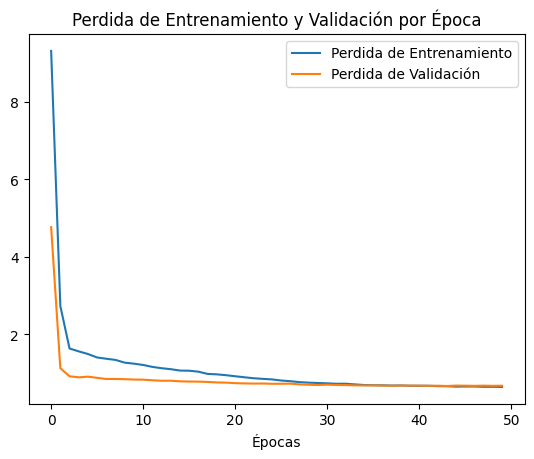

In [ ]:
fig, ax = plt.subplots (1,1)

ax.plot(train_loss_by_epoch, label='Perdida de Entrenamiento')
ax.plot(valid_loss_by_epoch, label='Perdida de Validación')
ax.set_xlabel('Épocas')
ax.set_label('Pérdida')
ax.set_title('Perdida de Entrenamiento y Validación por Época')
ax.legend()
plt.show()

Podemos observar que al usar regularización L2 (weight decay) y Batch normalization el modelo no overfittea


3- Elegir un usuario al azar, una película que dicho usuario haya puntuado y verificar la predicción del modelo. Comparar con el puntaje real que el usuario asignó a dicha película.

In [ ]:
nnetembeddings_2.eval()

# Elegir un usuario al azar

random_user_index = random.randint(0, len(train_x_user) - 1)
random_user = train_x_user[random_user_index]

# Obtener todas las películas calificadas por este usuario

user_movie_indices = np.where(train_x_user == random_user)[0]
random_user_movies = train_x_movie[user_movie_indices]

# Elegir una película al azar calificada por este usuario

random_movie_index = random.choice(user_movie_indices)
random_movie = train_x_movie[random_movie_index]

# Obtener la puntuación real

actual_rating = y_train[random_movie_index]

# Extraer las características (x) correspondientes a este usuario y película

x_tensor = torch.tensor(x_train[random_movie_index], dtype=torch.float32).unsqueeze(0).to(device)

# Convertir los índices de usuario y película a tensores

random_user_tensor = torch.tensor([random_user], dtype=torch.int64).to(device)
random_movie_tensor = torch.tensor([random_movie], dtype=torch.int64).to(device)

# Obtener la predicción del modelo

with torch.no_grad():
    predicted_rating = nnetembeddings_2(x_tensor, random_user_tensor, random_movie_tensor).item()

# Mostrar los resultados

print(f"Usuario ID: {random_user}")
print(f"Película ID: {random_movie}")
print(f"Puntuación real: {actual_rating}")
print(f"Predicción del modelo: {predicted_rating:.3f}")


Usuario ID: 73
Película ID: 73
Puntuación real: 3.5
Predicción del modelo: 3.189


4- Realizar una recomendación de película para el usuario del punto 3 utilizando los embeddings de usuario o los embeddings de películas. Comprobar si la recomendación es correcta haciendo una predicción del puntuaje con la red neuronal.

La recomendación se realizará segun las siguientes condiciones:

* Recomendar la pelicula que mayor puntaje de prediccion tenga siempre y cuando no la haya visto y su prediccion sea mayor a 3. Sino, recomendar la pelicula con mayor puntaje real.

In [ ]:
nnetembeddings_2.eval()

# Calcular las predicciones del modelo para todas las películas posibles

all_movies_tensor = torch.arange(0, 200, dtype=torch.int64).to(device)
predicted_ratings = []

with torch.no_grad():
    user_embeddings = nnetembeddings_2.embeddings_1(torch.tensor([random_user]).to(device))
    for movie in all_movies_tensor:
        movie_tensor = torch.tensor([movie], dtype=torch.int64).to(device)
        movie_embeddings = nnetembeddings_2.embeddings_2(movie_tensor)
        predicted_rating = nnetembeddings_2.output(torch.cat([user_embeddings, movie_embeddings], dim=1)).item()
        predicted_ratings.append(predicted_rating)

predicted_ratings_tensor = torch.tensor(predicted_ratings)

# Obtener la película con la mayor predicción

max_predicted_rating_index = torch.argmax(predicted_ratings_tensor)
recommended_movie_index = max_predicted_rating_index.item()
recommended_movie = all_movies_tensor[recommended_movie_index].item()
predicted_rating_for_recommendation = predicted_ratings_tensor[recommended_movie_index].item()

# Verificar si el usuario ha visto la película

if recommended_movie not in random_user_movies:

    # Si no la ha visto, recomendarla si la predicción es mayor o igual a 3

    if predicted_rating_for_recommendation >= 3:
        print(f"Usuario ID: {random_user.item()}")
        print(f"Película recomendada ID: {recommended_movie}")
        print(f"Predicción del modelo para la película recomendada: {predicted_rating_for_recommendation:.3f}")
    else:
        # Si no supera la predicción, buscar la película mejor valorada que haya visto

        max_user_rating_index = torch.tensor(np.argmax(y_train[np.isin(train_x_movie, random_user_movies)]))
        recommended_movie_index = max_user_rating_index.item()
        recommended_movie = random_user_movies[recommended_movie_index].item()
        actual_rating = y_train[(train_x_user == random_user) & (train_x_movie == recommended_movie)].item()
        print(f"Usuario ID: {random_user.item()}")
        print(f"Película recomendada ID: {recommended_movie}")
        print(f"Predicción del modelo para la película recomendada: {predicted_rating_for_recommendation:.3f}")
        print(f"Puntuación real: {actual_rating}")


Usuario ID: 73
Película recomendada ID: 6
Predicción del modelo para la película recomendada: 3.363
